<h1>
Quick Start Guide for S2
</h1>

<p>
This is a quick tutorial on how to use S2. S2 uses the Kotlin language as the "glue" language to call a (large) number of Java Virtual Machine (JVM) based math, engineering and data science libraries. S2 uses <a title="NM Dev numerical libray" href="https://nm.dev" target="_blank" rel="noopener">NM Dev numerical libray</a> at its core to define the interfaces (or contracts) of some fundamental math concepts such as functions so that different libraries are interoperable (aka. they talk to each other). S2 comes also with a number of databases, e.g., financial data, that you can use. To use S2, all you need to know is (1) Kotlin and (2) the API of the classes/models/algorithms/data that you are interested in. S2 is meant to be a (very) simple language and platform for you to do data science using interactive programming. Once you finish coding in S2, you can build your code to binaries so that it runs anywhere on JVM.
</p>

<p>
Happy coding!
</p>


<h2>Basic Kotlin</h2>

The best way to learn a new language is by examples. I had never read a single tutorial on how to code in Kotlin but I was able to code up all the examples you see here just by copy-and-pasting code. :) So, I collect a number of often used syntax for you to get started. They seem to be enough to do most of the math in the examples. Hit "SHIFT+ENTER" in any cell to execute the code in the cell.

For a proper introduction to coding in Kotlin, see <a title="Kotlin docs" href="https://kotlinlang.org/docs/home.html" target="_blank" rel="noopener">Kotlin docs</a> (which I confess that I have never read it). 

In [23]:
// doing arithmetics
1 + 1

2

In [2]:
2 * 2

4

In [3]:
// a real number (or Double) must have a decimal point
// 1 is not a Double (error); 1. is not a Double (error); 1.0 *is* a Double
1.0

1.0

In [4]:
6.0 / 2

3.0

In [5]:
// define a constant
val A = 1.0

In [6]:
val B = 2.0

In [7]:
A + B

3.0

In [8]:
// define a changable variable
var x : Double = 1.0

In [9]:
x = x + 1
x

2.0

In [10]:
// a loop
for (i in 1..3) {
    println(i)
}

1
2
3


In [18]:
// array
val arr1 = arrayOf(1.0, 2.0, 3.0, 4.0, 5.0)
println(java.util.Arrays.toString(arr1)) // can also use: import java.util.Arrays 
for (i in arr1) {
    println(i)
}

[1.0, 2.0, 3.0, 4.0, 5.0]
1.0
2.0
3.0
4.0
5.0


In [21]:
// define a function
fun add1(x : Double) : Double {
    return x + 1.0
}
add1(2.0)

3.0

<h2> Doing Math </h2>

On the left panel is a large collection of <a title="S2 examples" href="https://s20.nm.dev/#/home" target="_blank">S2 examples</a> to show you how to call the (many) libraries supported by S2 from simple linear algebra to machine learning (and growing). I copy and paste some of the simpler snippets here to show case how to do math using S2. You can click into the examples and execute them (by hitting SHIFT+ENTER in the cells).

In [ ]:
// ALWAYS START THIS MAGICAL KEYWORD USING S2 or nothing will work
%use s2

In [36]:
// define a vector
var v = DenseVector(arrayOf(1.1, -2.2, 3.3))
println(v)

// define a matrix
var A = DenseMatrix(arrayOf(
    doubleArrayOf(1.0, 2.0, 3.0),
    doubleArrayOf(4.0, 5.0, 6.0)))
println(A)

// B = Av
val B = A.multiply(v)
println(B)

[1.100000, -2.200000, 3.300000] 
2x3
	[,1] [,2] [,3] 
[1,] 1.000000, 2.000000, 3.000000, 
[2,] 4.000000, 5.000000, 6.000000, 
[6.600000, 13.200000] 


In [52]:
// define a function f(x)
val f: UnivariateRealFunction = object : AbstractUnivariateRealFunction() {
    override fun evaluate(x: Double): Double {
        return x.pow(2) + 2*x + 1 // x^2 + 2x + 1
    }
}

// find root for a function
val solver = NewtonRoot(1e-9, 10)
val root: Double = solver.solve(f, 0.5)
println(String.format("f(%f) = %f", root, f.evaluate(root)))

f(-0.998535) = 0.000002


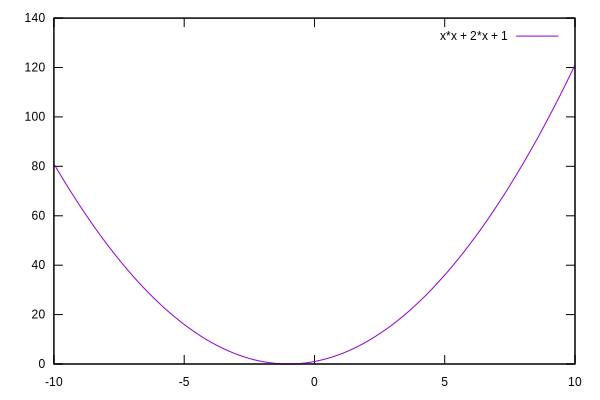

In [48]:
// plot a function
val p = JGnuplot(false)
p.addPlot("x*x + 2*x + 1")
p.plot()

In [57]:
// optimization
val solver = BrentMinimizer(1e-15, 20)
val soln = solver.solve(f)
val xmin: Double = soln.minimizer()
val fmin: Double = f.evaluate(xmin)
println(String.format("f(%f) = %f", xmin, fmin))

f(0.000000) = 1.000000


In [62]:
// differentiate f w.r.t. x once
val df1: UnivariateRealFunction = FiniteDifference(f, 1, FiniteDifference.Type.CENTRAL) // 2x + 2
df1.evaluate(1.0)

// integration
val integrator: Integrator = Riemann()
val I: Double = integrator.integrate(df1, 0.0, 1.0) // ∫_[0,1] (2x + 2) dx = x^2 + 2x
I

3.000000000218579

In [75]:
// statistics
val gaussian = NormalRNG(0.0, 1.0) // a standard Gaussian random number generator
val numbers: MutableList<Double> = mutableListOf()
for (i in 1..10000) { // generate random numbers
    val x: Double = gaussian.nextDouble()
    numbers.add(x)
}
val arr = numbers.toDoubleArray()
println(Mean(arr).value())
println(Variance(arr).standardDeviation())
println(Skewness(arr).value())
println(Kurtosis(arr).value())

0.007440710227587757
0.9934094869218749
-3.733142452297809E-4
-0.003197798050856182


In [79]:
// Download stock data for "AAPL" between two dates.
val aapl = s2.dataFrame("stock", "AAPL", "2020-01-01", "2020-11-01")
aapl

A DataFrame: 211 x 10
     ticker         date     open     high      low    close      volume   dividends   closeunadj
 1     AAPL   2020-01-02    74.06    75.15   73.797   75.088   135647456           0       300.35
 2     AAPL   2020-01-03   74.287   75.145   74.125   74.358   146535512           0       297.43
 3     AAPL   2020-01-06   73.448    74.99   73.188    74.95   117288824           0        299.8
 4     AAPL   2020-01-07    74.96   75.225    74.37   74.597   111510620           0       298.39
 5     AAPL   2020-01-08    74.29    76.11   74.289   75.797   132363784           0       303.19
 6     AAPL   2020-01-09   76.809   77.608    76.55   77.407   167082252           0       309.63
 7     AAPL   2020-01-10    77.65   78.168   77.062   77.582   140869088           0       310.33
 8     AAPL   2020-01-13    77.91   79.267   77.787    79.24   120114968           0       316.96
 9     AAPL   2020-01-14   79.175   79.392   78.043    78.17   162613828           0       312.6